In [123]:
!pip install jovian --upgrade --quiet

In [124]:
import jovian

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [8]:
od.download(dataset_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: uppulaabhishek
Your Kaggle Key: ········


  0%|                                                                                      | 0.00/3.83M [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████| 3.83M/3.83M [00:55<00:00, 72.7kB/s]

In [9]:
# Execute this to save new versions of the notebook
jovian.commit(project="logisticregression")

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "uppula-abhishek/logisticregression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/uppula-abhishek/logisticregression


'https://jovian.ai/uppula-abhishek/logisticregression'

In [10]:
import os
data_dir = './weather-dataset-rattle-package'
os.listdir(data_dir)
train_csv = data_dir + '/weatherAUS.csv'

In [11]:
!pip install pandas --quiet

In [12]:
import pandas as pd

In [13]:
weather_df = pd.read_csv(train_csv)

In [14]:
weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [15]:
weather_df.shape

(145460, 23)

In [16]:
weather_df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [17]:
weather_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [18]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [19]:
!pip install plotly

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
px.histogram(weather_df,x='Location',color='RainTomorrow')

In [24]:
px.histogram(weather_df,x='RainTomorrow',color='RainToday')

In [28]:
px.scatter(weather_df.sample(2000),x='MinTemp',y='MaxTemp',color='RainToday')

In [29]:
px.scatter(weather_df.sample(2000),x='Humidity3pm',y='Temp3pm',color='RainToday')

In [33]:
#to work with sample dataset

use_sample = True

sample_fraction = 0.1

raw_df = weather_df.sample(frac = sample_fraction).copy()

In [34]:
raw_df.shape

(14079, 23)

In [35]:
jovian.commit(project="logisticregression")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "uppula-abhishek/logisticregression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/uppula-abhishek/logisticregression


'https://jovian.ai/uppula-abhishek/logisticregression'

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
train_val_df,test_df = train_test_split(weather_df,test_size =0.2,random_state=42)
train_df, val_df = train_test_split(train_val_df,test_size =0.25,random_state=42)

In [40]:
train_df.shape

(84471, 23)

In [41]:
val_df.shape

(28158, 23)

In [43]:
test_df.shape

(28158, 23)

<AxesSubplot:xlabel='Date', ylabel='count'>

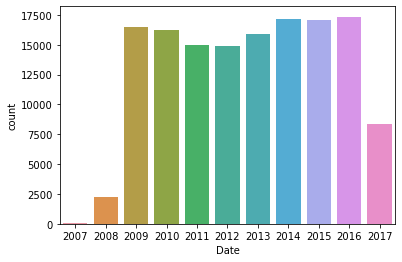

In [45]:
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year)

In [46]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [47]:
train_df.shape

(97988, 23)

In [48]:
val_df.shape

(17089, 23)

In [49]:
test_df.shape

(25710, 23)

In [50]:
jovian.commit(project="logisticregression")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "uppula-abhishek/logisticregression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/uppula-abhishek/logisticregression


'https://jovian.ai/uppula-abhishek/logisticregression'

In [53]:
    input_col = list(train_df.columns[1:-1]).copy()
    taret_val = "RainTomorrow"

In [54]:
input_col

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [55]:
input_val = train_df[input_col].copy()
target_val = train_df[taret_val].copy()

In [56]:
input_val

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [57]:
target_val

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [58]:
val_inputs = val_df[input_col].copy()
val_targets =val_df[taret_val].copy()

In [59]:
test_inputs = test_df[input_col].copy()
test_targets =test_df[taret_val].copy()

In [60]:
import numpy as np

In [63]:
numeric_cols = input_val.select_dtypes(include=np.number).columns.copy()
cate_cols = input_val.select_dtypes('object').columns.copy()

In [62]:
numeric_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [64]:
cate_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [70]:
input_val[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [73]:
input_val[cate_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [74]:
jovian.commit(project="logisticregression")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "uppula-abhishek/logisticregression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/uppula-abhishek/logisticregression


'https://jovian.ai/uppula-abhishek/logisticregression'

In [76]:
from sklearn.impute import SimpleImputer

In [78]:
imputer = SimpleImputer(strategy='mean')

In [80]:
weather_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [81]:
input_val[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [82]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

In [83]:
input_val[numeric_cols] = imputer.transform(input_val[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [85]:
input_val[numeric_cols].isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

In [87]:
val_inputs[numeric_cols].isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

In [88]:
test_inputs[numeric_cols].isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(weather_df[numeric_cols])

MinMaxScaler()

In [94]:
input_val[numeric_cols] = scaler.transform(input_val[numeric_cols]).copy()
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols]).copy()
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols]).copy()

In [95]:
jovian.commit(project="logisticregression")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "uppula-abhishek/logisticregression" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/uppula-abhishek/logisticregression


'https://jovian.ai/uppula-abhishek/logisticregression'

In [96]:
input_val[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [105]:
weather_df[cate_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [108]:
weather_df2 = weather_df[cate_cols].fillna('Unknown')

In [109]:
encoder.fit(weather_df2[cate_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [110]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [112]:
encoded_cols = list(encoder.get_feature_names(cate_cols))

In [113]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [115]:
input_val[encoded_cols] = encoder.transform(input_val[cate_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[cate_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[cate_cols].fillna('Unknown'))

In [116]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
2498           ENE       0.372093        NaN        ESE  ...            0.0   
2499           SSE       0.341085        SSE         SE  ...            1.0   
2500           ENE       0.325581        ESE        ENE  ...            0.0   
2501           SSE       0.255814         SE        SSE  ...            0.0   
2502           ENE       0.193798         SE        SSE  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
145454           E       0.193798        ESE          E  ...            0.0   
145455           E       0.193798         SE        ENE  ...            0.0   
145456         NNW       0.124031         SE          N  ...            0.0   
145457           N       0.240310         SE        WNW  ...            0.0   
145458          SE       0.170543        SSE          N  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  \
2498               0.0             0.0            0.0                 0.0   
2499               0.0             0.0            0.0                 0.0   
2500               0.0             0.0            0.0                 0.0   
2501               1.0             0.0            0.0                 0.0   
2502               1.0             0.0            0.0                 0.0   
...                ...             ...            ...                 ...   
145454             0.0             0.0            0.0                 0.0   
145455             0.0             0.0            0.0                 0.0   
145456             0.0             0.0            0.0                 0.0   
145457             0.0             0.0            0.0                 0.0   
145458             0.0             0.0            0.0                 0.0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  \
2498             0.0             0.0             0.0           1.0   
2499             0.0             0.0             0.0           1.0   
2500             0.0             0.0             0.0           0.0   
2501             0.0             0.0             0.0           0.0   
2502             0.0             0.0             0.0           0.0   
...              ...             ...             ...           ...   
145454           0.0             0.0             0.0           1.0   
145455           0.0             0.0             0.0           1.0   
145456           0.0             0.0             0.0           1.0   
145457           0.0             1.0             0.0           1.0   
145458           0.0             0.0             0.0           1.0   

        RainToday_Yes  
2498              0.0  
2499              0.0  
2500              1.0  
2501              1.0  
2502              1.0  
...               ...  
145454            0.0  
145455            0.0  
145456            0.0  
145457            0.0  
145458            0.0  

[25710 rows x 123 columns]

In [120]:
print("Train Inputs",input_val.shape)
print("Train Tragets",target_val.shape)

print("Validation Inputs",val_inputs.shape)
print("Validation Tragets",val_targets.shape)

print("Test Inputs",test_inputs.shape)
print("Test Tragets",test_targets.shape)

Train Inputs (97988, 123)
Train Tragets (97988,)
Validation Inputs (17089, 123)
Validation Tragets (17089,)
Test Inputs (25710, 123)
Test Tragets (25710,)


In [127]:
!pip install pyarrow --quiet

In [133]:
input_val.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [134]:
pd.DataFrame(target_val).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [135]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')


In [136]:
train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')
test_targets = pd.read_parquet('test_targets.parquet')


RainTomorrow
2498             No
2499            Yes
2500            Yes
2501            Yes
2502             No
...             ...
145454           No
145455           No
145456           No
145457           No
145458           No

[25710 rows x 1 columns]

In [138]:
from sklearn.linear_model import LogisticRegression

In [140]:
model = LogisticRegression(solver='liblinear')

In [150]:
%%time
model.fit(train_inputs[numeric_cols].join(train_inputs[encoded_cols]),target_val)

Wall time: 2.27 s


LogisticRegression(solver='liblinear')

In [152]:
print(model.coef_)

[[ 8.98620430e-01 -2.87988913e+00  3.16277690e+00  8.54276935e-01
  -1.67139143e+00  6.76440314e+00 -9.42331937e-01 -1.42842481e+00
   3.22895598e-01  5.99531749e+00  5.46388371e+00 -9.17681812e+00
  -1.62290143e-01  1.28765851e+00  4.74725930e-01  2.02141318e+00
   6.01649434e-01 -5.52483514e-01  4.78140189e-01  7.67838479e-03
   3.46814075e-01 -3.52276204e-01  1.79707957e-01  4.40484696e-01
  -1.39835505e-02  2.89408821e-02  2.58143114e-01 -2.12057307e-02
  -4.27933962e-02 -4.83140649e-01 -1.37565280e-01 -5.76056922e-01
  -7.87517140e-01 -2.55405553e-01 -3.28879449e-01 -5.69000307e-01
   8.18283325e-02  1.33851918e-02  6.41278725e-02 -9.02054449e-01
  -4.44333025e-01  8.50088223e-03 -4.60611675e-01 -4.65516505e-01
  -6.94940559e-02  1.91155437e-01  4.50474619e-01  6.08122726e-01
   4.27316106e-01 -2.83302080e-02  2.51543335e-01 -3.21605094e-01
   4.24957571e-01 -5.90378622e-02 -1.13200752e-01 -7.28380355e-01
   3.66449576e-01  1.83589737e-01  1.83975460e-01  1.86603583e-01
  -2.49267

In [179]:
n = len(model.coef_.ravel())

weight_df = pd.DataFrame({'features': (numeric_cols.tolist() + encoded_cols)[:n],'weight':model.coef_.ravel() })

In [171]:
print(model.intercept_)

[-2.44955346]


In [176]:
weight_df

features    weight
0           MinTemp  0.898620
1           MaxTemp -2.879889
2          Rainfall  3.162777
3       Evaporation  0.854277
4          Sunshine -1.671391
..              ...       ...
113    WindDir3pm_W -0.180371
114  WindDir3pm_WNW -0.033496
115  WindDir3pm_WSW -0.275974
116    RainToday_No -1.473516
117   RainToday_Yes -0.976037

[118 rows x 2 columns]

In [181]:
X_train = train_inputs[numeric_cols].join(train_inputs[encoded_cols])
X_val = val_inputs[numeric_cols].join(val_inputs[encoded_cols])
X_test = test_inputs[numeric_cols].join(test_inputs[encoded_cols])

In [183]:
train_preds = model.predict(X_train)

In [184]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [185]:
train_targets

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

In [186]:
from sklearn.metrics import accuracy_score

In [188]:
accuracy_score(train_targets,train_preds)

0.8519206433440829

In [189]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94400986, 0.05599014],
       [0.94073987, 0.05926013],
       [0.96093519, 0.03906481],
       ...,
       [0.98749069, 0.01250931],
       [0.98334621, 0.01665379],
       [0.87453058, 0.12546942]])

In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [191]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    

Accuracy: 85.40%


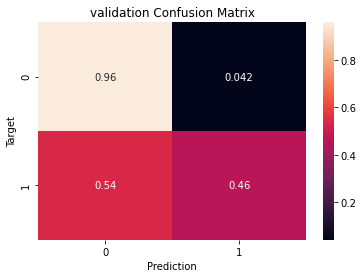

In [193]:
predict_and_plot(X_val,val_targets,'validation')

Accuracy: 84.20%


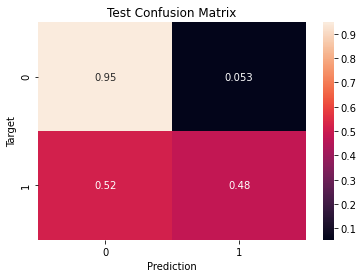

In [194]:
predict_and_plot(X_test,test_targets,'Test')

In [197]:
model1 = LogisticRegression(solver='liblinear')
model1.fit(train_inputs[numeric_cols],target_val)

LogisticRegression(solver='liblinear')

In [198]:
def predict_and_plot1(inputs, targets, name=''):
    preds = model1.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

In [199]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

Accuracy: 84.50%


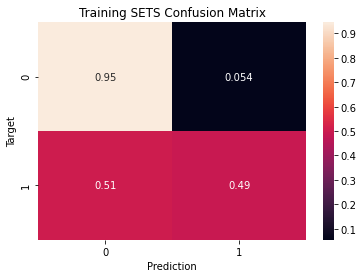

In [200]:
predict_and_plot1(X_train, train_targets, 'Training SETS')

Accuracy: 84.60%


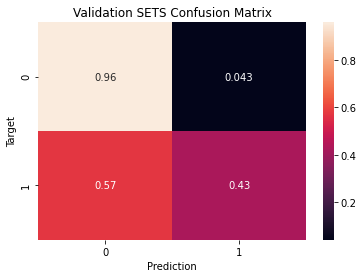

In [202]:
predict_and_plot1(X_val, val_targets, 'Validation SETS')

Accuracy: 83.85%


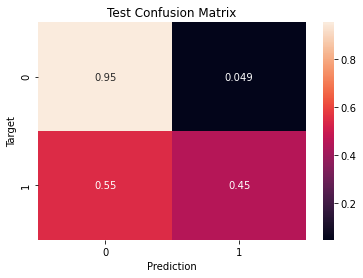

In [203]:
predict_and_plot1(X_test, test_targets, 'Test')